In [16]:
from google.colab import files
uploaded = files.upload()  # Upload both Orders.csv and Details.csv


Saving Cleaned_Ecommerce_Data.csv to Cleaned_Ecommerce_Data.csv


In [3]:
import pandas as pd
import numpy as np


# Load datasets
orders_df = pd.read_csv('/content/Orders.csv')
details_df = pd.read_csv('/content/Details.csv')


#Data Cleaning

In [4]:
print("Missing values in orders_df:\n", orders_df.isnull().sum())
print("\nMissing values in details_df:\n", details_df.isnull().sum())


Missing values in orders_df:
 Order ID        0
Order Date      0
CustomerName    1
State           0
City            0
dtype: int64

Missing values in details_df:
 Order ID        0
Amount          1
Profit          1
Quantity        1
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64


In [5]:
# Display first 7 rows of orders_df
orders_df.head(7)



,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,NaN,Maharashtra,Mumbai
4,B-25757,28-12-2018,Vishakha,Madhya Pradesh,Indore
5,B-25967,21-01-2018,Sudevi,Uttar Pradesh,Prayagraj
6,B-25955,16-01-2018,Shiva,Maharashtra,Pune


In [6]:
details_df.head(7)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096.0,658.0,7.0,Electronics,Electronic Games,COD
1,B-26055,5729.0,64.0,14.0,Furniture,Chairs,EMI
2,B-25955,2927.0,146.0,8.0,Furniture,Bookcases,EMI
3,B-26093,NaN,712.0,8.0,Electronics,Printers,Credit Card
4,B-25602,2617.0,NaN,4.0,Electronics,Phones,Credit Card
5,B-25881,2244.0,247.0,NaN,Clothing,Trousers,Credit Card
6,B-25696,275.0,-275.0,4.0,Clothing,Saree,COD


In [7]:
orders_df['CustomerName'] = orders_df['CustomerName'].fillna('Unknown')

In [8]:
details_df['Amount'] = details_df['Amount'].fillna(details_df['Amount'].mean())
details_df['Profit'] = details_df['Profit'].fillna(details_df['Profit'].median())
details_df['Quantity'] = details_df['Quantity'].fillna(details_df['Quantity'].mode()[0])


In [9]:
print("Missing values in orders_df:\n", orders_df.isnull().sum())
print("\nMissing values in details_df:\n", details_df.isnull().sum())


Missing values in orders_df:
 Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

Missing values in details_df:
 Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64


In [10]:
details_df.head(10)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096.000000,658.0,7.0,Electronics,Electronic Games,COD
1,B-26055,5729.000000,64.0,14.0,Furniture,Chairs,EMI
2,B-25955,2927.000000,146.0,8.0,Furniture,Bookcases,EMI
3,B-26093,290.142762,712.0,8.0,Electronics,Printers,Credit Card
4,B-25602,2617.000000,8.0,4.0,Electronics,Phones,Credit Card
5,B-25881,2244.000000,247.0,2.0,Clothing,Trousers,Credit Card
6,B-25696,275.000000,-275.0,4.0,Clothing,Saree,COD
7,B-25687,387.000000,-213.0,5.0,Clothing,Saree,UPI
8,B-25643,50.000000,-44.0,2.0,Clothing,Hankerchief,UPI
9,B-25851,135.000000,-54.0,5.0,Clothing,Kurti,COD


In [11]:
orders_df.head(10)

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Unknown,Maharashtra,Mumbai
4,B-25757,28-12-2018,Vishakha,Madhya Pradesh,Indore
5,B-25967,21-01-2018,Sudevi,Uttar Pradesh,Prayagraj
6,B-25955,16-01-2018,Shiva,Maharashtra,Pune
7,B-26093,27-03-2018,Sarita,Maharashtra,Pune
8,B-25798,01-10-2018,Shishu,Andhra Pradesh,Hyderabad
9,B-25602,01-04-2018,Vrinda,Maharashtra,Pune


In [12]:
# Check for missing values
print(orders_df.isnull().sum())
print(details_df.isnull().sum())


Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64


#Merging

In [13]:
merged_df = pd.merge(orders_df, details_df, on='Order ID', how='inner')


In [ ]:
print(orders_df.isnull().sum())
print(details_df.isnull().sum())

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64


In [14]:
print("\nMerged Dataset Shape:",merged_df.shape)
print("\nData Types:\n", merged_df.dtypes)
print("\n",merged_df.head())


Merged Dataset Shape: (1500, 11)

Data Types:
 Order ID         object
Order Date       object
CustomerName     object
State            object
City             object
Amount          float64
Profit          float64
Quantity        float64
Category         object
Sub-Category     object
PaymentMode      object
dtype: object

   Order ID  Order Date CustomerName          State     City  Amount  Profit  \
0  B-26055  10-03-2018    Harivansh  Uttar Pradesh  Mathura  5729.0    64.0   
1  B-26055  10-03-2018    Harivansh  Uttar Pradesh  Mathura   671.0   114.0   
2  B-26055  10-03-2018    Harivansh  Uttar Pradesh  Mathura   443.0    11.0   
3  B-26055  10-03-2018    Harivansh  Uttar Pradesh  Mathura    57.0     7.0   
4  B-26055  10-03-2018    Harivansh  Uttar Pradesh  Mathura   227.0    48.0   

   Quantity     Category Sub-Category  PaymentMode  
0      14.0    Furniture       Chairs          EMI  
1       9.0  Electronics       Phones  Credit Card  
2       1.0     Clothing        Saree 

In [15]:
from datetime import datetime

# 🕒 Convert 'Order Date' to datetime format
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')

# ❌ Drop rows with invalid or missing dates
merged_df.dropna(subset=['Order Date'], inplace=True)

# 🗓️ Extract Year, Month, and Day of the Week
merged_df['Year'] = merged_df['Order Date'].dt.year
merged_df['Month'] = merged_df['Order Date'].dt.month
merged_df['Weekday'] = merged_df['Order Date'].dt.day_name()

# ➗ Add Profit Margin (%)
merged_df['Profit Margin'] = (merged_df['Profit'] / merged_df['Amount']) * 100

# ✅ Preview the data with new columns
print(merged_df[['Order Date', 'Year', 'Month', 'Weekday', 'Profit', 'Amount', 'Profit Margin']])


     Order Date  Year  Month    Weekday  Profit  Amount  Profit Margin
0    2018-10-03  2018     10  Wednesday    64.0  5729.0       1.117123
1    2018-10-03  2018     10  Wednesday   114.0   671.0      16.989568
2    2018-10-03  2018     10  Wednesday    11.0   443.0       2.483070
3    2018-10-03  2018     10  Wednesday     7.0    57.0      12.280702
4    2018-10-03  2018     10  Wednesday    48.0   227.0      21.145374
...         ...   ...    ...        ...     ...     ...            ...
1482 2018-01-05  2018      1     Friday    -8.0   299.0      -2.675585
1483 2018-02-06  2018      2    Tuesday    -2.0    20.0     -10.000000
1485 2018-12-03  2018     12     Monday     6.0    20.0      30.000000
1495 2018-03-08  2018      3   Thursday    -8.0    11.0     -72.727273
1497 2018-01-07  2018      1     Sunday    -6.0     8.0     -75.000000

[645 rows x 7 columns]


Initial shape of data: (1500, 15)

Summary statistics:
            Amount      Profit
count  1500.000000  1500.00000
mean    291.847333    24.64200
std     461.924620   168.55881
min       4.000000 -1981.00000
25%      47.750000   -12.00000
50%     122.000000     8.00000
75%     326.250000    38.00000
max    5729.000000  1864.00000


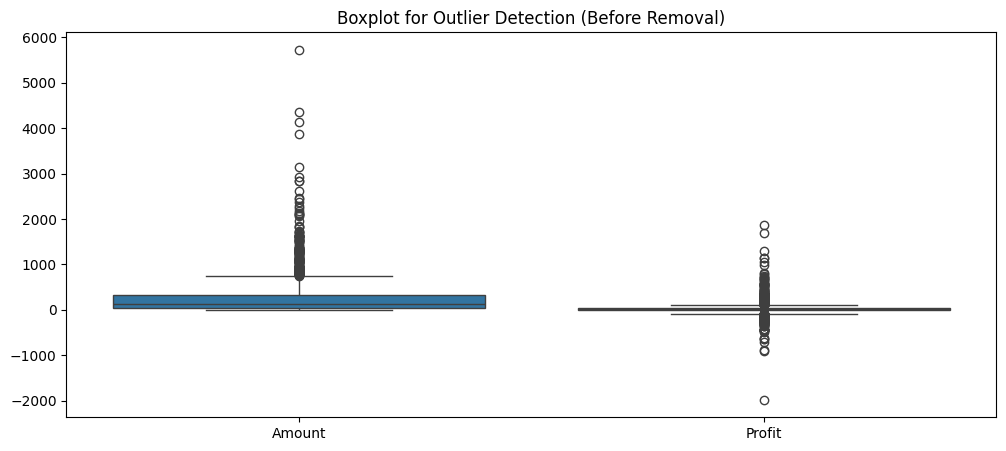

Shape after outlier removal: (1130, 15)


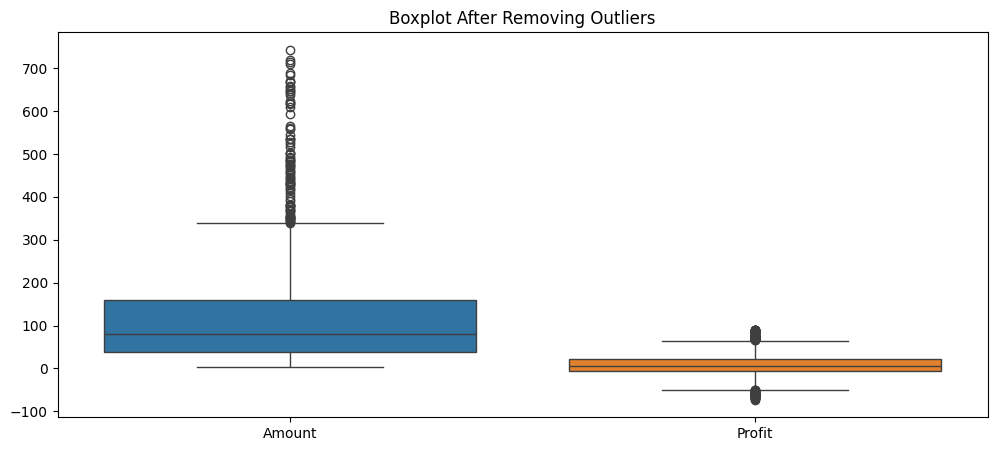

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset (update the filename as per your uploaded file)
df = pd.read_csv('/content/Cleaned_Ecommerce_Data.csv')  # Replace with actual filename

# Display basic info
print("Initial shape of data:", df.shape)
print("\nSummary statistics:")
print(df[['Amount', 'Profit']].describe())


#analyzing outliers in the 'Amount' and 'Profit' columns in the dataset using boxplots and the IQR method.
# Plot initial boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Amount', 'Profit']])
plt.title('Boxplot for Outlier Detection (Before Removal)')
plt.show()

# Function to remove outliers using IQR method
def remove_outliers_iqr_all(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply outlier removal
df_cleaned = remove_outliers_iqr_all(df, ['Amount', 'Profit'])

# Shape after removal
print("Shape after outlier removal:", df_cleaned.shape)

# Plot boxplot after outlier removal
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_cleaned[['Amount', 'Profit']])
plt.title('Boxplot After Removing Outliers')
plt.show()


#Feature Extraction

In [18]:
import pandas as pd


merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')


merged_df['Month'] = merged_df['Order Date'].dt.month
merged_df['Day of Week'] = merged_df['Order Date'].dt.day_name()
merged_df['Quarter'] = merged_df['Order Date'].dt.quarter


# --- Profit Margin (if not already present or needs recalculation) ---
if 'Profit Margin' not in merged_df.columns or merged_df['Profit Margin'].isnull().any():
    merged_df['Profit Margin'] = merged_df['Profit'] / merged_df['Amount'].replace(0, pd.NA)


merged_df['Product Profit'] = merged_df['Profit']


# --- Customer Features ---
merged_df['Total Spend by Customer'] = merged_df.groupby('CustomerName')['Amount'].transform('sum')

merged_df['Total Sale Value'] = merged_df['Amount']


merged_df['Is Return'] = merged_df['Profit'] < 0


merged_df['Product View Count'] = merged_df.groupby('Sub-Category')['Quantity'].transform('sum')


monthly_sales = merged_df.groupby('Month')['Total Sale Value'].sum().reset_index()


print("Sample Data with Extracted Features:")
print(merged_df[['Order Date', 'Sub-Category', 'Category', 'Quantity', 'Amount', 'Profit', 'CustomerName',
                 'Month', 'Day of Week', 'Quarter', 'Product Profit', 'Profit Margin',
                  'Total Spend by Customer', 'Total Sale Value',
                 'Is Return', 'Product View Count']].head(10))

print("\n📊 Monthly Sales Aggregated:")
print(monthly_sales.head(12))


Sample Data with Extracted Features:
  Order Date Sub-Category     Category  Quantity  Amount  Profit CustomerName  \
0 2018-10-03       Chairs    Furniture      14.0  5729.0    64.0    Harivansh   
1 2018-10-03       Phones  Electronics       9.0   671.0   114.0    Harivansh   
2 2018-10-03        Saree     Clothing       1.0   443.0    11.0    Harivansh   
3 2018-10-03        Shirt     Clothing       2.0    57.0     7.0    Harivansh   
4 2018-10-03        Stole     Clothing       5.0   227.0    48.0    Harivansh   
5 2018-10-03        Shirt     Clothing      14.0   213.0     4.0    Harivansh   
6 2018-10-03      T-shirt     Clothing       2.0    94.0    27.0    Harivansh   
7 2018-10-03     Printers  Electronics       2.0  1250.0   -12.0    Harivansh   
8 2018-10-03    Bookcases    Furniture       8.0  1218.0  -420.0    Harivansh   
9 2018-03-02     Printers  Electronics       3.0   610.0   208.0       Madhav   

   Month Day of Week  Quarter  Product Profit  Profit Margin  \
0     1

#Visualization

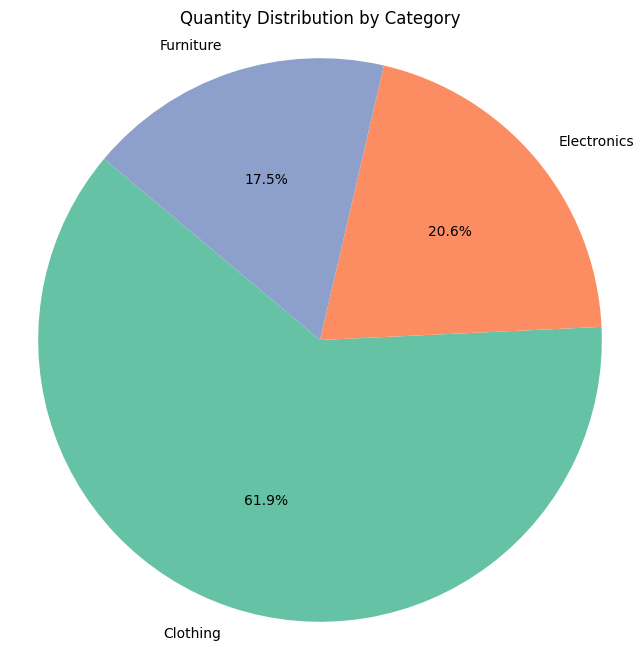

In [19]:
import matplotlib.pyplot as plt
category_quantity = merged_df.groupby('Category')['Quantity'].sum()

plt.figure(figsize=(8, 8))
plt.pie(category_quantity,
        labels=category_quantity.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2'))
plt.title('Quantity Distribution by Category')
plt.axis('equal')
plt.show()


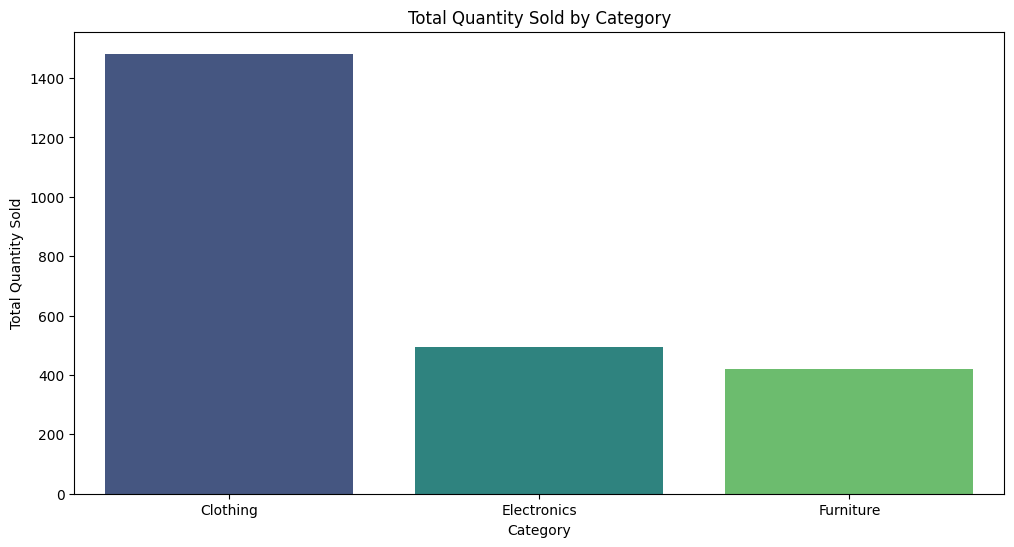

In [20]:
# 📊 Total Quantity by Category (fixed palette warning)
plt.figure(figsize=(12, 6))
plt.title('Total Quantity Sold by Category')
category_data = merged_df.groupby('Category')['Quantity'].sum().reset_index()
sns.barplot(data=category_data, x='Category', y='Quantity', hue='Category', palette='viridis', legend=False)
plt.ylabel('Total Quantity Sold')
plt.xlabel('Category')
plt.show()


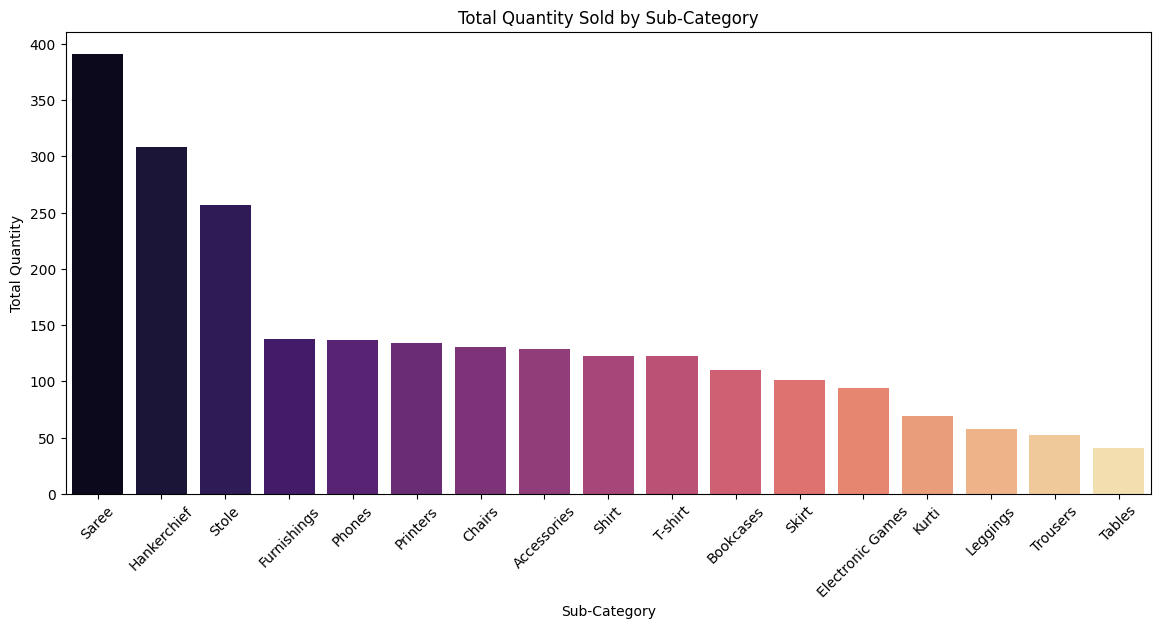

In [21]:
#  Total Quantity by Sub-Category
plt.figure(figsize=(14, 6))
plt.title('Total Quantity Sold by Sub-Category')
subcat_data = merged_df.groupby('Sub-Category')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)
sns.barplot(data=subcat_data, x='Sub-Category', y='Quantity', hue='Sub-Category', palette='magma', legend=False)
plt.ylabel('Total Quantity')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()


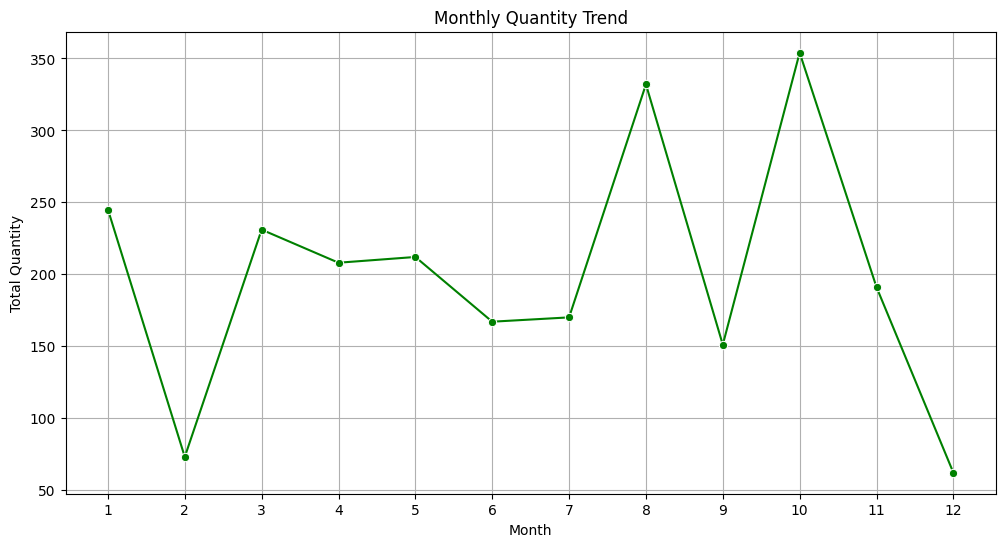

In [22]:
plt.figure(figsize=(12, 6))
monthly_quantity = merged_df.groupby('Month')['Quantity'].sum().reset_index()
sns.lineplot(data=monthly_quantity, x='Month', y='Quantity', marker='o', color='green')
plt.title('Monthly Quantity Trend')
plt.ylabel('Total Quantity')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [23]:
import plotly.express as px

monthly_quantity = merged_df.groupby('Month')['Quantity'].sum().reset_index()

# Create a Plotly line chart
fig = px.line(monthly_quantity, x='Month', y='Quantity',
              title='Monthly Quantity Trend', markers=True)

# Customize layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Quantity',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),
    template='plotly_white'  # Optional: for a clean background
)

fig.show()


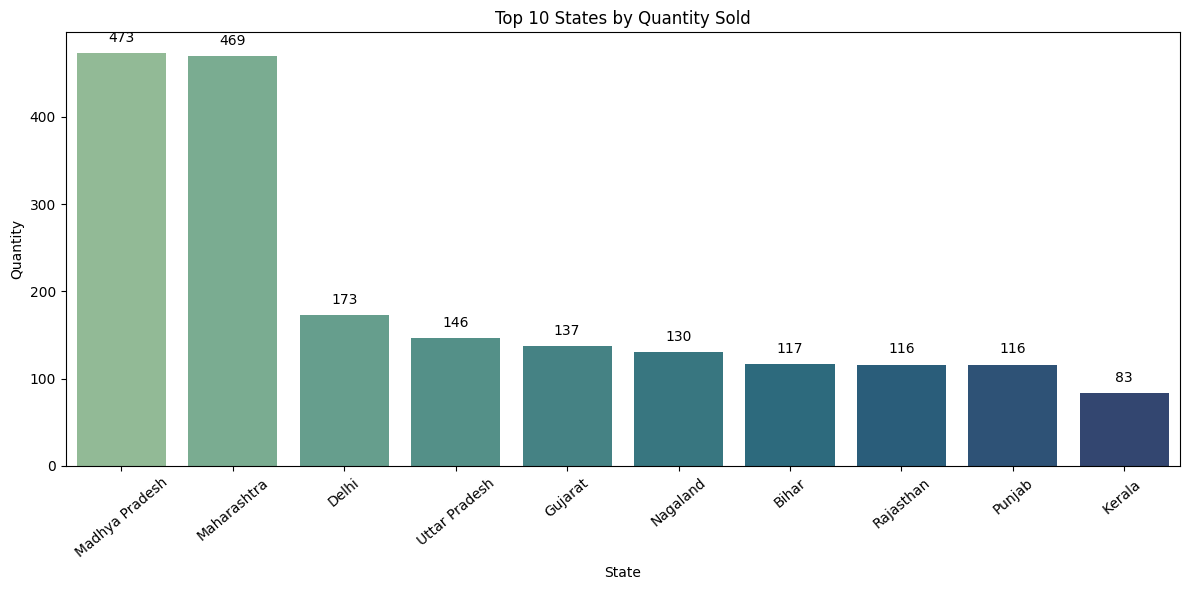

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and get the top 10 by quantity sold
top_states = merged_df.groupby('State')['Quantity'].sum().sort_values(ascending=False).head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, hue=top_states.index, palette='crest', dodge=False, legend=False)

# Add value labels above the bars
for i, value in enumerate(top_states.values):
    plt.text(i, value + 0.02 * max(top_states.values), f'{value:.0f}', ha='center', va='bottom')

# Customize plot
plt.title('Top 10 States by Quantity Sold')
plt.ylabel('Quantity')
plt.xlabel('State')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


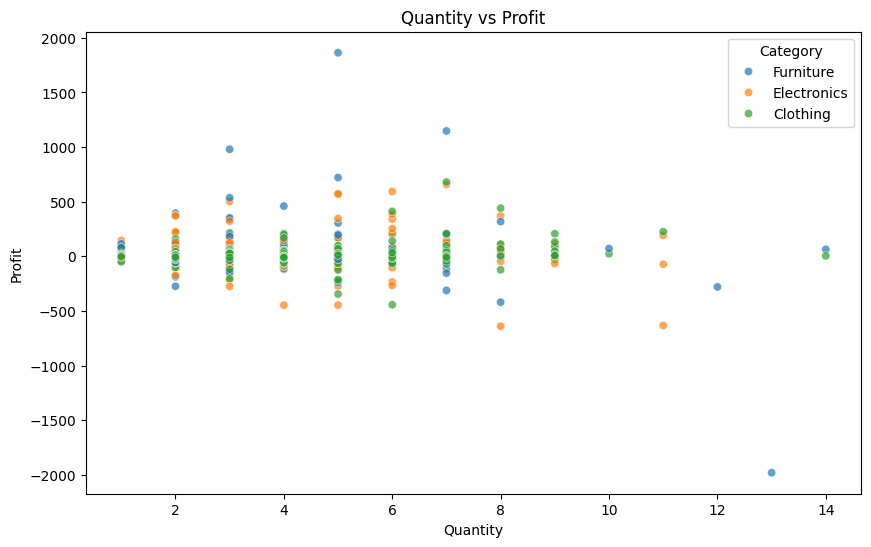

In [25]:
# Quantity vs Profit Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Quantity', y='Profit', hue='Category', alpha=0.7)
plt.title('Quantity vs Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.show()

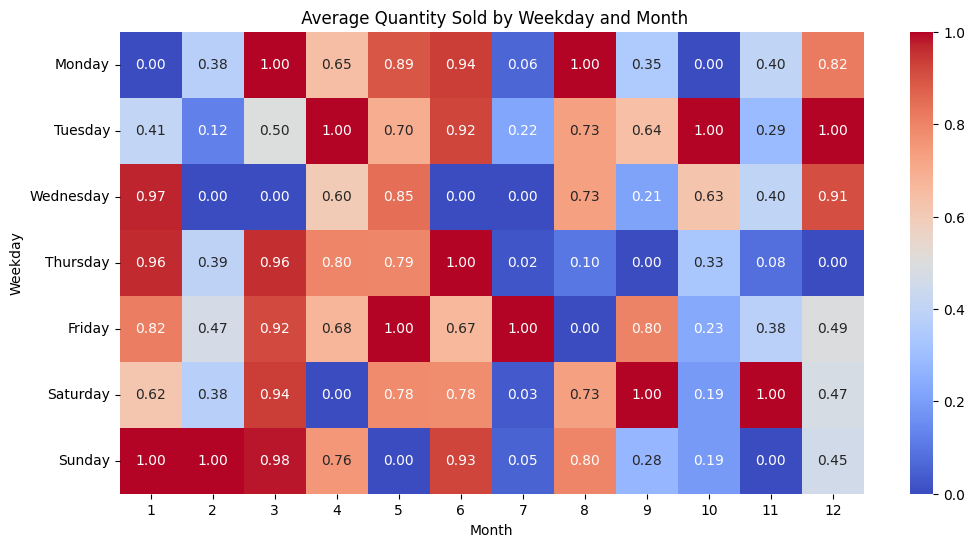

In [26]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Pivot table
pivot_heatmap = merged_df.pivot_table(index='Weekday', columns='Month', values='Quantity', aggfunc='mean')

# Reordering weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_heatmap = pivot_heatmap.reindex(ordered_days)

# Normalizing values row-wise
scaler = MinMaxScaler()
pivot_normalized = pd.DataFrame(scaler.fit_transform(pivot_heatmap.fillna(0)),
                                index=pivot_heatmap.index, columns=pivot_heatmap.columns)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_normalized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(' Average Quantity Sold by Weekday and Month')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.show()


#This shows how product demand varies across the year for each weekday


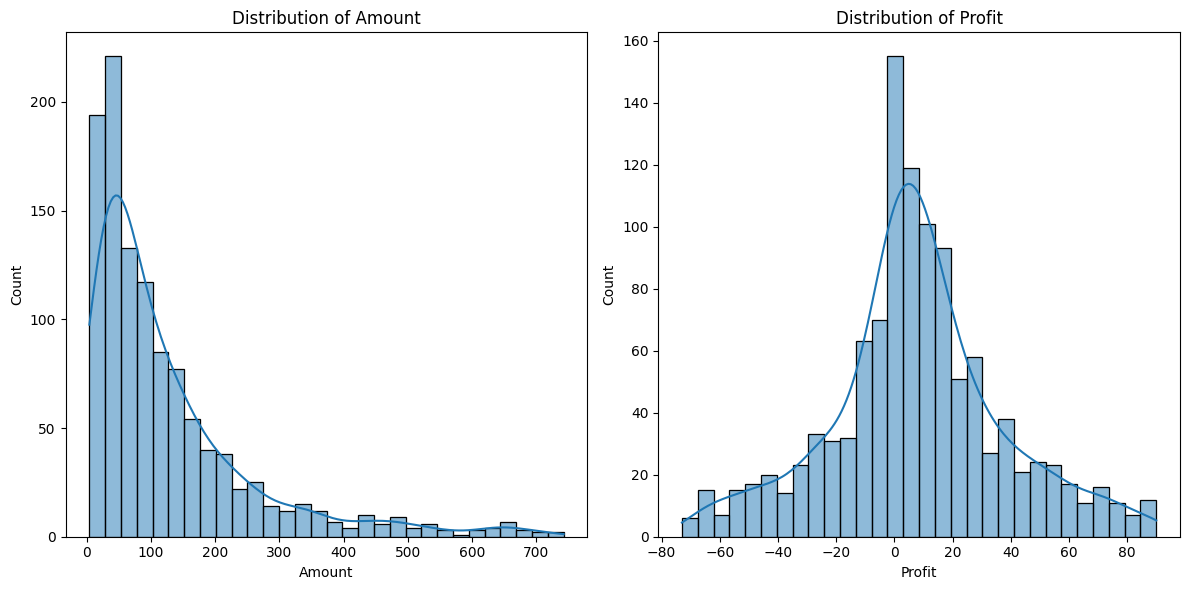

In [27]:
# Plot histograms for 'Amount' and 'Profit'
plt.figure(figsize=(12, 6))

# Histogram for 'Amount'
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')

# Histogram for 'Profit'
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Profit'], bins=30, kde=True)
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()
